In [18]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models


In [19]:
# Model configuration
batch_size = 50
loss_function = categorical_crossentropy
no_classes = 3
no_epochs = 25
optimizer = Adam(learning_rate=0.001)
verbosity = 1
num_folds = 5

In [20]:
data=pd.read_csv("/content/binary_banknote.csv")
data.head()

,3.6216,8.6661,-2.8073,-0.44698999999999994,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [21]:
#Changing pandas dataframe to numpy array
x = data.iloc[:,:4].values
y = data.iloc[:,4:5].values

In [22]:
#Standardization the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [23]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)


Y = one_hot_encoder.fit_transform(np.array(y).reshape(-1, 1))
Y[:1000]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [24]:

oos_y = []
oos_pred = []
oos_yt = []
oos_predt = []
train_acc=[]
test_loss=[]

In [25]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 0
for train, test in kfold.split(X, Y):
  fold_no = fold_no + 1
  model = Sequential()
  model.add(Dense(30, input_dim=4, activation='tanh'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  opt=tf.keras.optimizers.Adam(learning_rate=.01)
  
  # Compile the model
  model.compile(loss=loss_function,
                optimizer=opt,
                metrics=['accuracy'])

  #Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  count=0
  epcount=0
  # Fit data to model
  history = model.fit(X[train], Y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              validation_data=(X[test], Y[test]),
              verbose=verbosity)

  test_loss.append((history.history['val_loss'][-1]))
  #predicting accuracy of trained model
  predict_xt=model.predict(X[train])
  y_predt=np.argmax(predict_xt,axis=-1)
  oos_yt.append(Y[train])
  oos_predt.append(y_predt)    
  y_train=np.argmax(Y[train], axis=-1) 
  score = metrics.accuracy_score(y_train, y_predt)
  print(f"training accuracy): {score}")
  
  predict_x=model.predict(X[test])
  y_pred=np.argmax(predict_x,axis=-1)
  oos_y.append(Y[test])
  oos_pred.append(y_pred)    
  y_test=np.argmax(Y[test], axis=-1) 
  score = metrics.accuracy_score(y_test, y_pred)
  print(" validation accuracy): {score}")
  for i in history.history['val_accuracy']:
    count=count+1
    if i>=0.7905:
      epcount=count
      break
  print(epcount)
print("\n")
test_loss=(np.sum(test_loss)/5)
oos_yt = np.concatenate(oos_yt)
oos_predt = np.concatenate(oos_predt)
oos_y_comparet = np.argmax(oos_yt,axis=1) # For accuracy calculation
score1 = metrics.accuracy_score(oos_y_comparet, oos_predt)
print(f" average training accuracy: {score1}") 
cm1 = confusion_matrix(oos_y_comparet, oos_predt)
print(f"average validation loss:{test_loss}")
print("classwise   training accuracy :")
print(cm1.diagonal()/cm1.sum(axis=1))
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation
print("\n")
score = metrics.accuracy_score(oos_y_compare, oos_pred)
cm = confusion_matrix(oos_y_compare, oos_pred)
print("classwise   validation accuracy :")
print(cm.diagonal()/cm.sum(axis=1))
print(f"validation accuracy: {score}")     
print("f1 score is :")
print(f1_score(oos_y_compare.tolist(), oos_pred.tolist(), average='macro'))

print(metrics.classification_report(oos_y_compare,oos_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
22/22 [==============================] - 2s 28ms/step - loss: 0.1372 - accuracy: 0.9599 - val_loss: 0.0350 - val_accuracy: 0.9818
Epoch 2/25
22/22 [==============================] - 0s 9ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0164 - val_accuracy: 0.9964
Epoch 3/25
22/22 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 4/25
22/22 [==============================] - 0s 11ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/25
22/22 [==============================] - 0s 10ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 6/25
22/22 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/25
22/22 [==============================] - 0s 9ms/

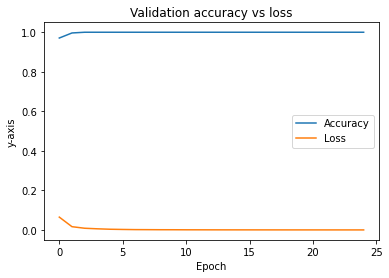

In [26]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Validation accuracy vs loss')
plt.ylabel('y-axis')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='center right')
plt.show()